In [3]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
urls = list()
currencies = list()
r = requests.get(url)
soup = BeautifulSoup(r.text)
rates = soup.find_all('tr')[2:]
#<td class="text-center print_hide phone-small-font" data-table="歷史匯率"><a href="/xrt/history/USD" target="_blank">查詢</a></td>
for rate in rates:
    urls.append(rate.find(class_ ='text-center print_hide phone-small-font').a['href'])
    currencies.append(rate.find(class_ = 'hidden-phone print_show').text.replace(' ','').replace('\n',''))
    print(rate.find(class_ = 'hidden-phone print_show').text.replace(' ','').replace('\n',''))
    print(' 現金匯率,本行買入:',rate.find('td',{'data-table':"本行現金買入"}).text, end='')
    print(',本行賣出:',rate.find('td',{'data-table':"本行現金賣出"}).text)

for i in range(len(urls)):
    urls[i] = 'https://rate.bot.com.tw/'+urls[i].replace('forward','quote/2019-11')

美金(USD)
 現金匯率,本行買入: 29.565,本行賣出: 30.235
港幣(HKD)
 現金匯率,本行買入: 3.699,本行賣出: 3.903
英鎊(GBP)
 現金匯率,本行買入: 38.08,本行賣出: 40.2
澳幣(AUD)
 現金匯率,本行買入: 20.21,本行賣出: 20.99
加拿大幣(CAD)
 現金匯率,本行買入: 22.49,本行賣出: 23.4
新加坡幣(SGD)
 現金匯率,本行買入: 21.62,本行賣出: 22.53
瑞士法郎(CHF)
 現金匯率,本行買入: 29.93,本行賣出: 31.13
日圓(JPY)
 現金匯率,本行買入: 0.2648,本行賣出: 0.2776
南非幣(ZAR)
 現金匯率,本行買入: -,本行賣出: -
瑞典幣(SEK)
 現金匯率,本行買入: 2.79,本行賣出: 3.31
紐元(NZD)
 現金匯率,本行買入: 19.44,本行賣出: 20.29
泰幣(THB)
 現金匯率,本行買入: 0.8651,本行賣出: 1.0531
菲國比索(PHP)
 現金匯率,本行買入: 0.5175,本行賣出: 0.6505
印尼幣(IDR)
 現金匯率,本行買入: 0.00183,本行賣出: 0.00253
歐元(EUR)
 現金匯率,本行買入: 32.49,本行賣出: 33.83
韓元(KRW)
 現金匯率,本行買入: 0.0241,本行賣出: 0.028
越南盾(VND)
 現金匯率,本行買入: 0.00092,本行賣出: 0.00142
馬來幣(MYR)
 現金匯率,本行買入: 6.219,本行賣出: 7.863
人民幣(CNY)
 現金匯率,本行買入: 4.23,本行賣出: 4.392


<Figure size 720x576 with 0 Axes>

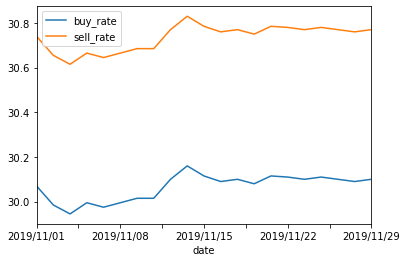

<Figure size 720x576 with 0 Axes>

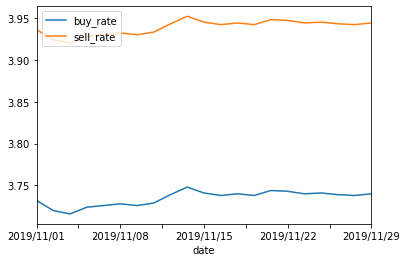

<Figure size 720x576 with 0 Axes>

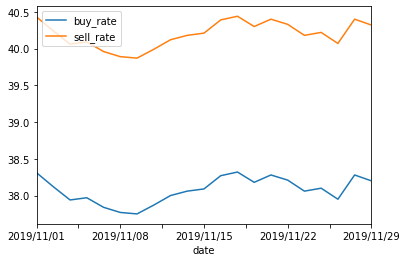

<Figure size 720x576 with 0 Axes>

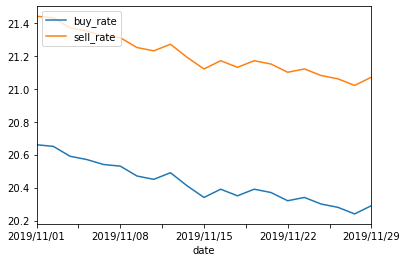

<Figure size 720x576 with 0 Axes>

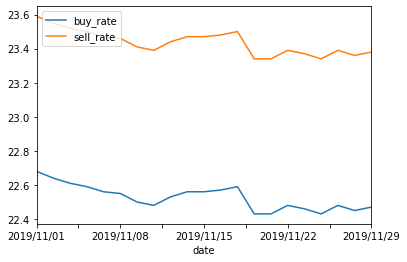

<Figure size 720x576 with 0 Axes>

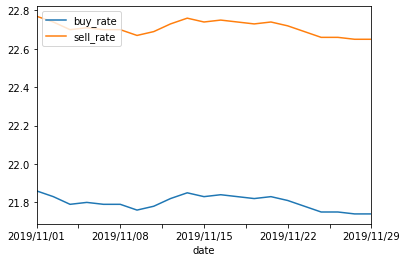

<Figure size 720x576 with 0 Axes>

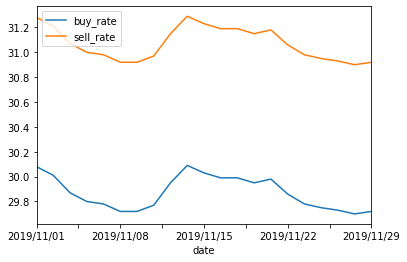

<Figure size 720x576 with 0 Axes>

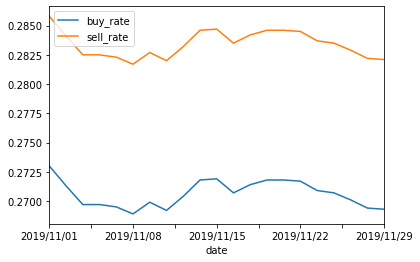

<Figure size 720x576 with 0 Axes>

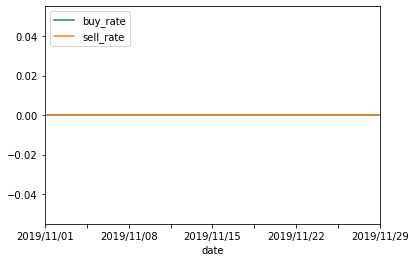

<Figure size 720x576 with 0 Axes>

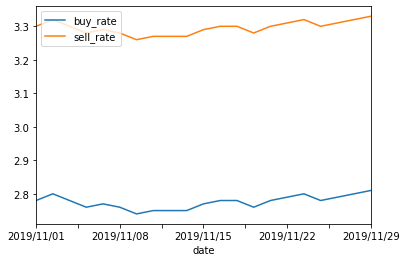

<Figure size 720x576 with 0 Axes>

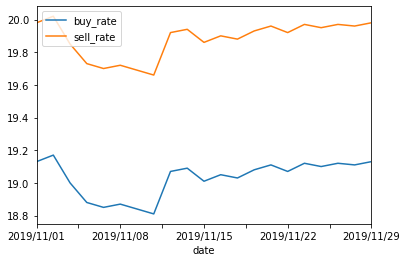

<Figure size 720x576 with 0 Axes>

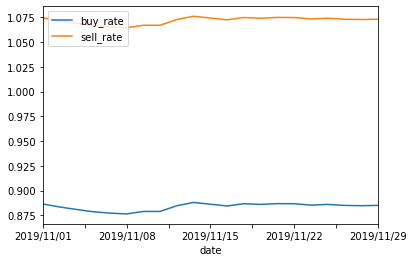

<Figure size 720x576 with 0 Axes>

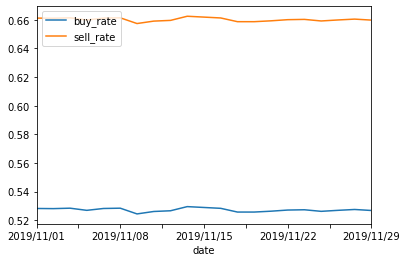

<Figure size 720x576 with 0 Axes>

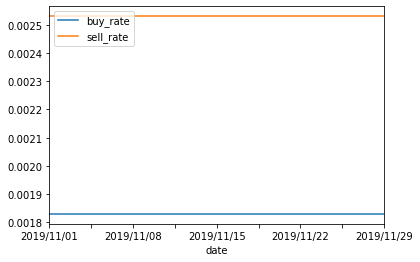

<Figure size 720x576 with 0 Axes>

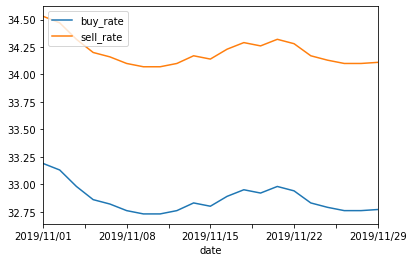

<Figure size 720x576 with 0 Axes>

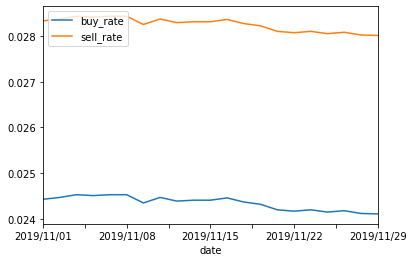

<Figure size 720x576 with 0 Axes>

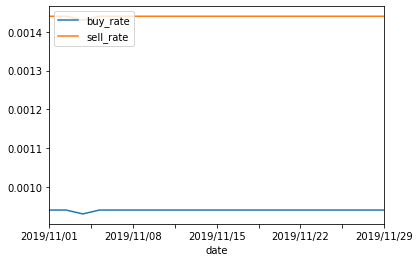

<Figure size 720x576 with 0 Axes>

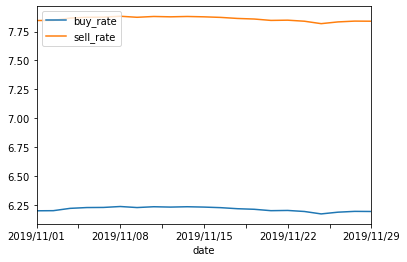

<Figure size 720x576 with 0 Axes>

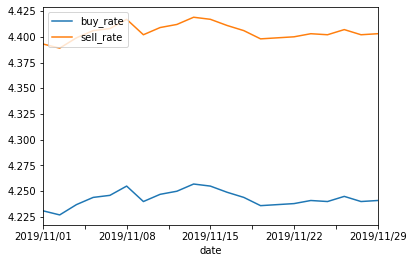

In [54]:
for u in range(urls):
    r = requests.get(u)
    soup = BeautifulSoup(r.text)
    # print(soup)
    times = soup.find_all('tr')[2:]
    buy_rate = []
    sell_rate = []
    date_history = []
    for t in times:
        date_history.append(t.find('td').text)
        buy_rate.append(float(t.find_all('td')[2].text))
        sell_rate.append(float(t.find_all('td')[3].text))
    buy_rate = buy_rate[::-1]
    sell_rate = sell_rate[::-1]
    date_history = date_history[::-1]
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':buy_rate,
                                        'sell_rate':sell_rate})
# print(HistoryExchangeRate)
    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
# print(HistoryExchangeRate)
# 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    print()
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()

In [45]:
rates[0]

<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="幣別國旗" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show" style="text-indent:30px;">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">29.565</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">30.235</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">29.915</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">30.015</td>
<td class="text-center print_hide phone-small-font" data-table="遠期匯率買入/賣出"><a href="/xrt/forward/USD">查詢</a>